In [1]:
try:
  import google.colab
  IN_COLAB = True
except ImportError:
  IN_COLAB = False

if IN_COLAB:
  print("Running on Colab")
else:
  print("Running locally")

Running locally


In [2]:
# Add the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')


In [3]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

In [4]:
if IN_COLAB:
    dataset_path = '/content/drive/MyDrive/Recommendation System Project/sample30.csv'
else:
    dataset_path = 'sample30.csv'

In [5]:
# Start reading the data set
review_data = pd.read_csv(dataset_path,encoding='latin-1')

In [6]:
# Lets have a look on thje data set
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


##  1.  Exploratory Data Analysis

---

In [7]:
# Lets further have look at the statistics of the data set
review_data.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
# Lets have a look at the data types of the data set
review_data.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object

In [9]:
# Get the columns of the data set
review_data.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [16]:
# How many Categories are there in the data set
review_data['categories'].nunique()

270

In [17]:
# distribution between the categories
review_data['categories'].value_counts().sort_values(ascending=False)



Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3325
Household Chemicals,Household Cleaners,Bath & 

### Now we would like to explore the most frequesnt terms used in categories. Since the data in each category cell is collection of many items we need to perform some pre processing before finding the most frequent words


In [10]:
# Lower case all the text in the review text
review_data['categoriescategory_freq'] = review_data['categories'].str.lower()

In [11]:
# remove the stop words
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

stop = stopwords.words('english')
review_data['categoriescategory_freq'] = review_data['categoriescategory_freq'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sakpa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Remove the special characters
review_data['categoriescategory_freq'] = review_data['categoriescategory_freq'].apply(lambda x: re.sub(r'[^\w\s]','',x))



In [21]:
review_data['categoriescategory_freq']

0        movies music  booksmusicrbmovies  tvmovie bund...
1        foodpackaged foodssnackscrackerssnacks cookies...
2        foodpackaged foodssnackscrackerssnacks cookies...
3        personal caremedicine cabinetlubricantspermici...
4        personal caremedicine cabinetlubricantspermici...
                               ...                        
29995    beautyhair careshampoo  conditionerholiday sho...
29996    beautyhair careshampoo  conditionerholiday sho...
29997    beautyhair careshampoo  conditionerholiday sho...
29998    beautyhair careshampoo  conditionerholiday sho...
29999    beautyhair careshampoo  conditionerholiday sho...
Name: categoriescategory_freq, Length: 30000, dtype: object

In [13]:
# Top 10 words used in the categories and plot them in the bar chart
freq = pd.Series(' '.join(review_data['categoriescategory_freq']).split()).value_counts()[:20]
freq

movies                12608
tv                    12200
household             11321
householdhousehold    11218
supplieshousehold     11107
storage               11077
brandshome            11065
essentialscleaning    11043
cleanershealth        10948
restockfood           10932
care                   9761
music                  9635
cleaners               8907
essentialsfeatured     8809
suppliescleaners       8701
purpose                8561
cleanerssurface        8560
shopclassroom          8547
supplieskitchen        8546
grocerypaper           8545
dtype: int64

#### Observation:
---
So we get that few of the most used categories are movies and TV shows,household supplies,cleaning supplies, groceries.

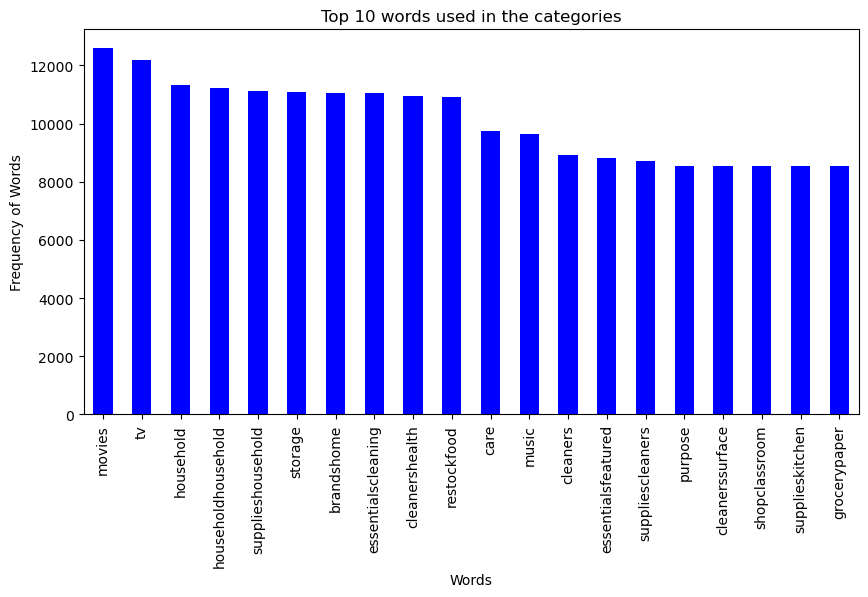

In [23]:
# Plot the top 10 words
freq.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Top 10 words used in the categories")
plt.ylabel('Frequency of Words')
plt.xlabel('Words')
plt.show()

In [24]:
# Brands in the data set
review_data['brand'].nunique()


214

In [25]:
# Lets have a look at the distribution of the brands
review_data['brand'].value_counts()


Clorox                   10585
Warner Home Video         3325
Disney                    1200
L'oreal Paris             1186
FOX                        887
                         ...  
Pacific Natural Foods        1
Noosa                        1
Southern Enterprises         1
SLOAN VALVE COMPANY          1
Universal Music              1
Name: brand, Length: 214, dtype: int64

<Axes: >

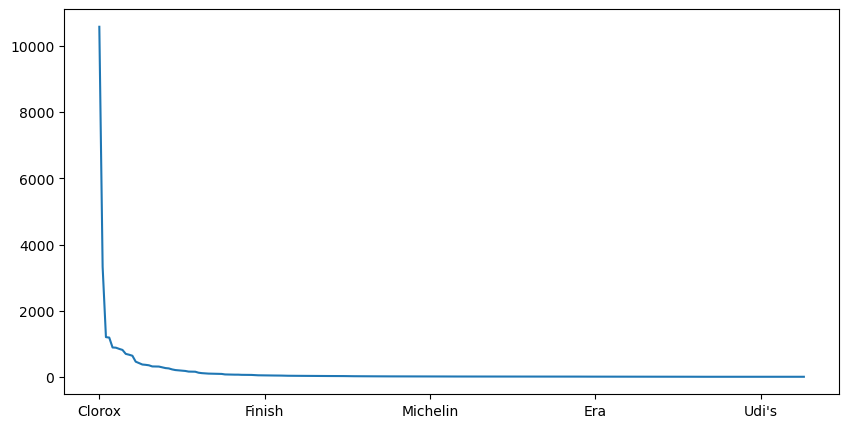

In [26]:
# Plot the distribution of the brands in line plot
review_data['brand'].value_counts().plot(kind='line', figsize=(10, 5))


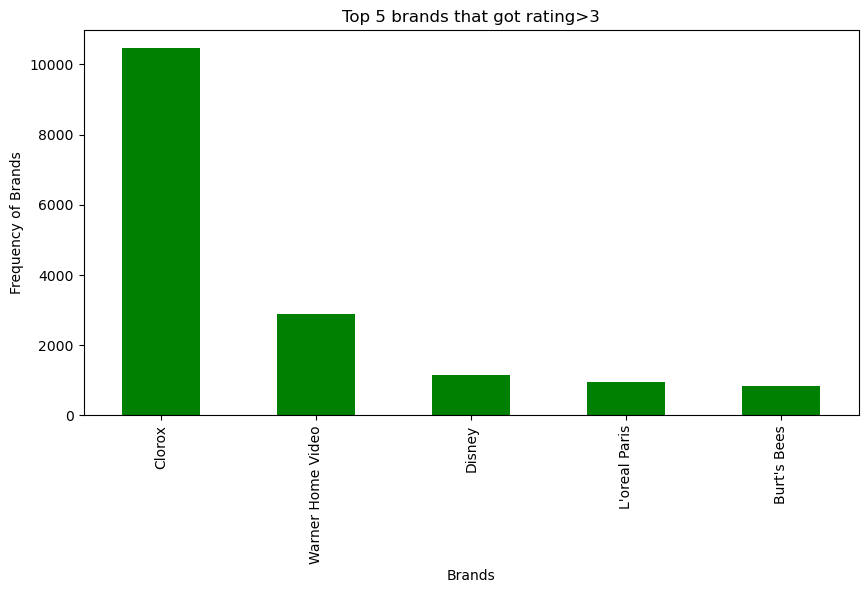

In [27]:
# top 5 brands that got rating>3
# Lets first filter the data set where the rating is greater than 3
# Then get the top 5 brands
# Then plot the data

top_5_brands = review_data[review_data['reviews_rating'] > 3]['brand'].value_counts().head(5)
top_5_brands.plot(kind='bar', figsize=(10, 5), color='green')
plt.title("Top 5 brands that got rating>3")
plt.ylabel('Frequency of Brands')
plt.xlabel('Brands')
plt.show()



Text(0.5, 0, 'Brands')

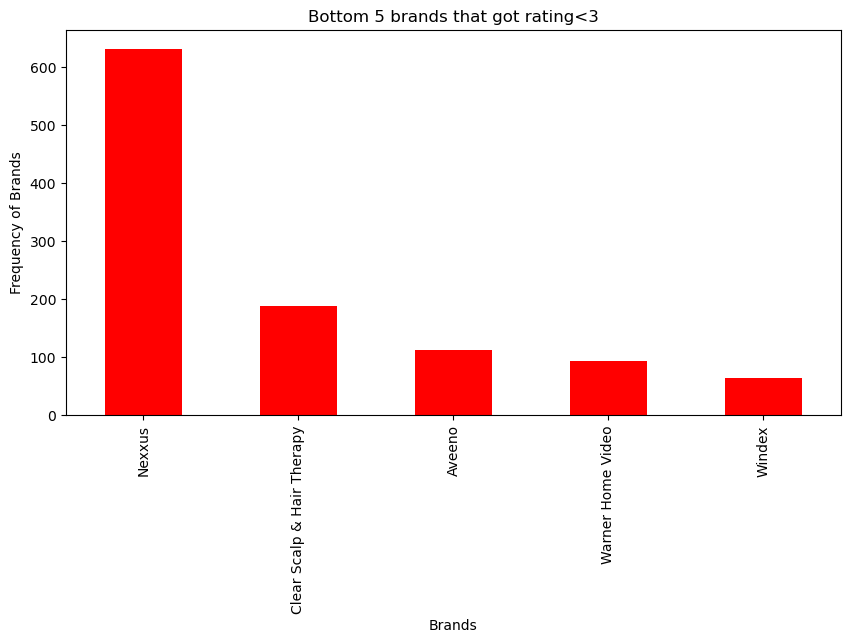

In [28]:
# Also get the top 5 brands that receive <3 reviews and plot them
bootom_5_brands = review_data[review_data['reviews_rating'] < 3]['brand'].value_counts().head(5)
bootom_5_brands.plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Bottom 5 brands that got rating<3")
plt.ylabel('Frequency of Brands')
plt.xlabel('Brands')

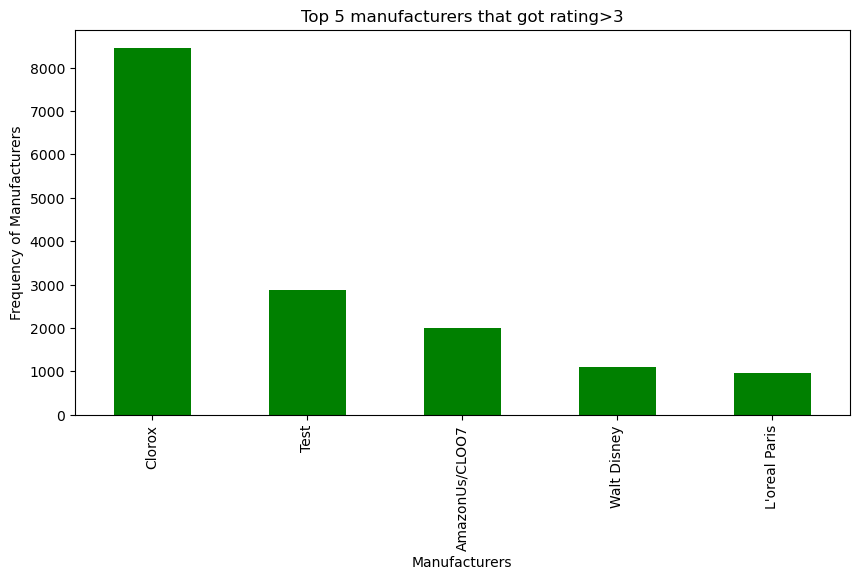

In [29]:
# Also nice to visualize the top 5 manufacturers that got rating>3
top_5_manufacturers = review_data[review_data['reviews_rating'] > 3]['manufacturer'].value_counts().head(5)
top_5_manufacturers.plot(kind='bar', figsize=(10, 5), color='green')
plt.title("Top 5 manufacturers that got rating>3")
plt.ylabel('Frequency of Manufacturers')
plt.xlabel('Manufacturers')
plt.show()

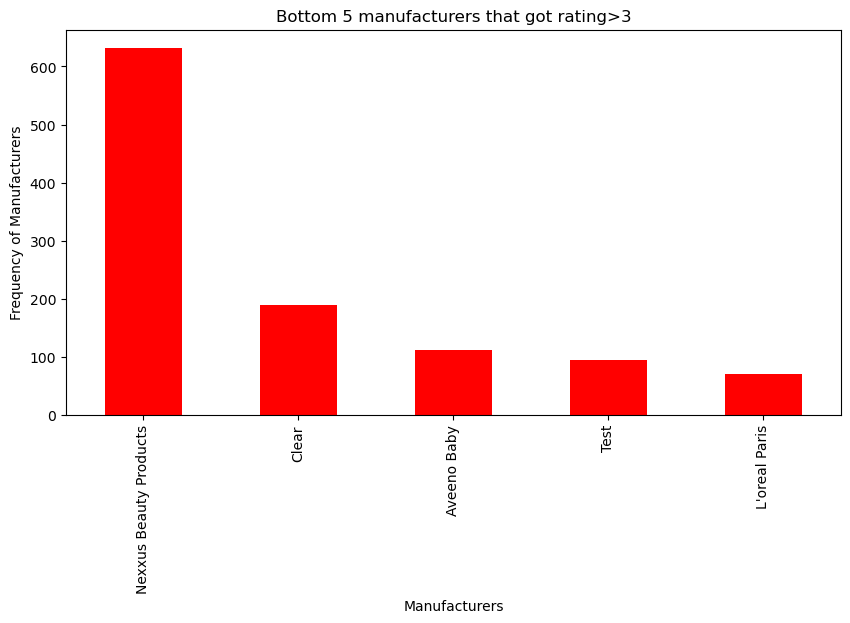

In [30]:
# Bottom 5 manufacturers that got rating<3

bottom_5_manufacturers = review_data[review_data['reviews_rating'] < 3]['manufacturer'].value_counts().head(5)
bottom_5_manufacturers.plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Bottom 5 manufacturers that got rating>3")
plt.ylabel('Frequency of Manufacturers')
plt.xlabel('Manufacturers')
plt.show()

In [31]:
# Lets have a look in the distribution of  reviews_didPurchase
review_data['reviews_didPurchase'].value_counts()

False    14498
True      1434
Name: reviews_didPurchase, dtype: int64

In [14]:
# Lets get the data for the reviews_didPurchase = True
review_data[review_data['reviews_didPurchase'] == True]['reviews_rating'].value_counts()/review_data[review_data['reviews_didPurchase'] == True]['reviews_rating'].count()



5    0.756625
4    0.135983
3    0.050907
1    0.036262
2    0.020223
Name: reviews_rating, dtype: float64

#### Observation :
----
It indicates that only 1434 reviews are provided after the customer purchased the product.14498 reviews were given even if the product was not purchased.

It also indicates customers generally provide positive feedback when they purchased the product, almost 90% reviewed 4 or 5


In [15]:
# Percenatge of null values in the data set
review_data.isnull().sum()/len(review_data)*100


id                          0.000000
brand                       0.000000
categories                  0.000000
manufacturer                0.470000
name                        0.000000
reviews_date                0.153333
reviews_didPurchase        46.893333
reviews_doRecommend         8.566667
reviews_rating              0.000000
reviews_text                0.000000
reviews_title               0.633333
reviews_userCity           93.570000
reviews_userProvince       99.433333
reviews_username            0.210000
user_sentiment              0.003333
categoriescategory_freq     0.000000
dtype: float64

#### Observation:
---
we see user demogrpahic data like reviews_userProvince  and reviews_username are significantly missing in the data set. So later we can drop these 2 columns for our model building activity.

Also we see almost 47% of reviews_didPurchase  are null. We will replace the null values as NA

In [16]:
# Replace null values of column reviews_didPurchase with 'NA'
review_data['reviews_didPurchase'].fillna('NA', inplace=True)


In [35]:
# Percenatge of null values in the data set
review_data.isnull().sum()/len(review_data)*100

id                          0.000000
brand                       0.000000
categories                  0.000000
manufacturer                0.470000
name                        0.000000
reviews_date                0.153333
reviews_didPurchase         0.000000
reviews_doRecommend         8.566667
reviews_rating              0.000000
reviews_text                0.000000
reviews_title               0.633333
reviews_userCity           93.570000
reviews_userProvince       99.433333
reviews_username            0.210000
user_sentiment              0.003333
categoriescategory_freq     0.000000
dtype: float64

In [36]:
# Lets also have a look on how many unique reviews are there in the data set
review_data['id'].nunique()/len(review_data)*100

0.9033333333333334

In [37]:
# Distribution of ID in review
review_data['id'].value_counts()


AVpf3VOfilAPnD_xjpun    8545
AVpfPaoqLJeJML435Xk9    3325
AVpfJP1C1cnluZ0-e3Xy    2039
AVpfW8y_LJeJML437ySW    1186
AVpfRTh1ilAPnD_xYic2    1143
                        ... 
AVpfP-rELJeJML435jEN       1
AVpfbpzd1cnluZ0-kqJV       1
AVpfbjraLJeJML439F91       1
AVpfa1joLJeJML4385hb       1
AV13O1A8GV-KLJ3akUyj       1
Name: id, Length: 271, dtype: int64

#### Observation:
---

271 unique values in 30,000 total reviews possible as few IDs like AVpf3VOfilAPnD_xjpun reviewed 8545 times, AVpfPaoqLJeJML435Xk9 reviewed more than 3K and so.

In [38]:
# Lets have a look at the distribution of the reviews_didPurchase
print(f"reviews_didPurchase distribution \n{review_data['reviews_didPurchase'].value_counts()} ")
print('--'*80)
print(f"reviews_doRecommend distribution \n{review_data['reviews_doRecommend'].value_counts()} ")
print('--'*80)
print(f"reviews_rating distribution \n{review_data['reviews_rating'].value_counts()} ")
print('--'*80)
print(f"user_sentiment distribution \n{review_data['user_sentiment'].value_counts()} ")

reviews_didPurchase distribution 
False    14498
NA       14068
True      1434
Name: reviews_didPurchase, dtype: int64 
----------------------------------------------------------------------------------------------------------------------------------------------------------------
reviews_doRecommend distribution 
True     25880
False     1550
Name: reviews_doRecommend, dtype: int64 
----------------------------------------------------------------------------------------------------------------------------------------------------------------
reviews_rating distribution 
5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64 
----------------------------------------------------------------------------------------------------------------------------------------------------------------
user_sentiment distribution 
Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64 


#### Observations
----
Class imbalance with sentiment as 26K+ is positive out of 30K

Class imbalance also is observed with the field reviews_doRecommend and to some extent with reviews_didPurchase distribution

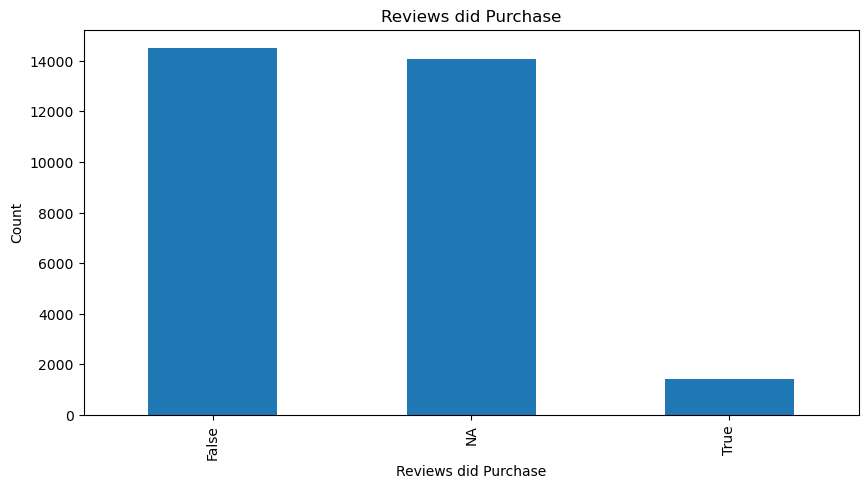

In [39]:
# Count Ratings provided by customers who have purchased the product, reviews_didPurchase = true
review_data['reviews_didPurchase'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Reviews did Purchase')
plt.xlabel('Reviews did Purchase')
plt.ylabel('Count')
plt.show()



#### Observation:
---
A major class imbalance issue, as the reviewers who purchased the product is highly outnumbered by reviewers who either did not purchase or the data set has no information whether reviewer purchased or not


In [17]:
# Now a bit more exploration on reviews_doRecommend, lets have check how many customers have recommended the product
# But first we should replace the null values with 'NA'
review_data['reviews_doRecommend'].fillna('NA', inplace=True)


<Axes: >

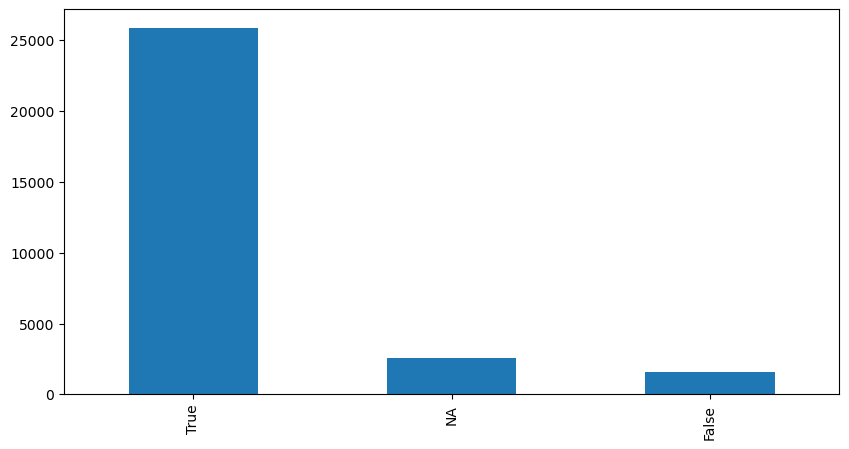

In [18]:
# Now a bit more exploration on reviews_doRecommend, lets have check how many customers have recommended the product
review_data['reviews_doRecommend'].value_counts().plot(kind='bar', figsize=(10, 5))


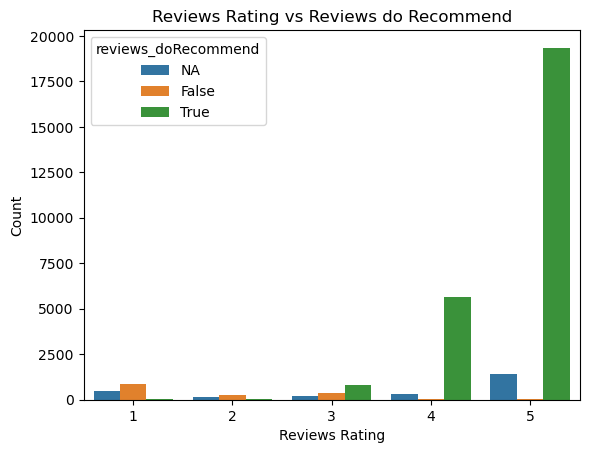

In [42]:
# Also have a check in the relation between reviews_doRecommend and reviews_rating
sns.countplot(x='reviews_rating', hue='reviews_doRecommend', data=review_data)
plt.title('Reviews Rating vs Reviews do Recommend')
plt.xlabel('Reviews Rating')
plt.ylabel('Count')
plt.show()

#### Observation:
---
Although negligible but we can see there are few poor reviews with 1,2 and to some extent 3 but customer has recommended the product.This is difficult to comprehend.


In [19]:
# Find the count of reviews_doRecommend = True for rating 1, 2
lowrated_recommended = review_data[(review_data['reviews_doRecommend'] == True) & (review_data['reviews_rating'].isin([1, 2]))][['reviews_rating', 'reviews_text']]
lowrated_recommended


,reviews_rating,reviews_text
66,2,GreatGreatmefeels great smells great succulent...
1302,2,"I like the results, except I think it's causin..."
1378,1,Hi i love this line used since high school. I ...
1537,1,Movie is fine... But does not include Ultravio...
1807,2,"Typical Zac Efron comedy, Anna Kendrick always..."
...,...,...
28822,1,I can see this working AMAZINGLY for someone w...
28826,1,I got these products as a sample for testing p...
28832,1,I can see this working AMAZINGLY for someone w...
28845,2,I received this product as a set free for test...


In [20]:
# Get 5 random records from lowrated_recommended and check the reviews_text
# Increase column size so that we can read the full text
pd.set_option('display.max_colwidth', None) # Changed -1 to None for unlimited width
lowrated_recommended.sample(5)

,reviews_rating,reviews_text
21768,2,"Dear Nexxus: I have used your Exxtra Gel, Superior Hold for several years, sold in the tan colored tube. Within the last 6 months or so, the packaging has changed to the copper colored tube, and the gel is different as well. It is less thick and does not hold as well. I was in a store recently and managed to find the older version. It reaffirms my contention that this new formula is not as effective as the old one. Please bring it back!!!"
6503,2,I wouldn't trust any other brand when it comes to disinfecting. This review was collected as part of a promotion.
22888,1,"It was on sale, so I bought it. After I got it the case was broken in half witch sucks a lot. But at least the disk are ok I guess. Will not order online if this happens."
28845,2,"I received this product as a set free for testing purposes. I used this set as soon as I could get my hands on it. Couldn't wait to use the entire set. The clay mask, the shampoo, and conditioner set are great as a whole but separately they do not work well for me. I have long thick hair and the product dried my scalp out when the mask was not applied first. The product, in my opinion doesn't smell the greatest either. This review was collected as part of a promotion."
21763,2,"Dear Nexxus: I have used your Exxtra Gel, Superior Hold for several years, sold in the tan colored tube. Within the last 6 months or so, the packaging has changed to the copper colored tube, and the gel is different as well. It is less thick and does not hold as well. I was in a store recently and managed to find the older version. It reaffirms my contention that this new formula is not as effective as the old one. Please bring it back!!!"


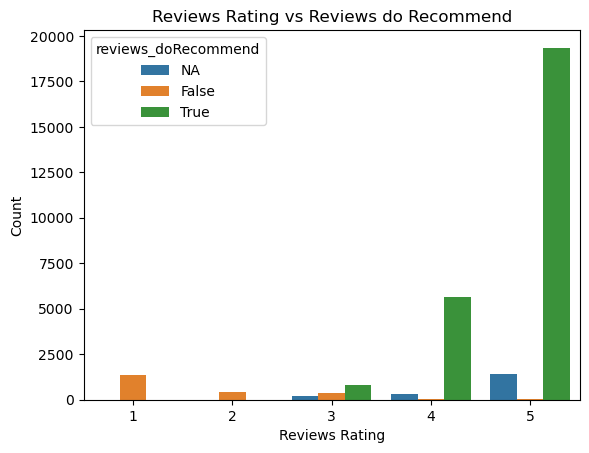

In [45]:
# From the random sample the review text for low ratings are also negative and thus we will change reviews_doRecommend = False for these records
# set reviews_doRecommend = False for reviews_rating = 1, 2
review_data.loc[(review_data['reviews_rating'].isin([1, 2])), 'reviews_doRecommend'] = False

# Also have a check in the relation between reviews_doRecommend and reviews_rating
sns.countplot(x='reviews_rating', hue='reviews_doRecommend', data=review_data)
plt.title('Reviews Rating vs Reviews do Recommend')
plt.xlabel('Reviews Rating')
plt.ylabel('Count')
plt.show()



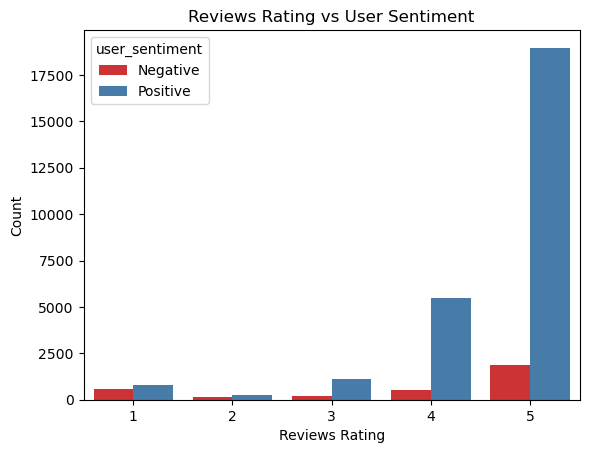

In [46]:
# Now have alook at the distribution of the reviews_rating and user_sentiment
sns.countplot(x='reviews_rating', hue='user_sentiment', data=review_data, palette='Set1', hue_order=['Negative', 'Positive'])
plt.title('Reviews Rating vs User Sentiment')
plt.xlabel('Reviews Rating')
plt.ylabel('Count')
plt.show()

In [21]:
# Get the records where reviews_rating = 5 and user_sentiment = Negative
df = review_data[(review_data['reviews_rating'] .isin([4,5])) & (review_data['user_sentiment'] == 'Negative')][['reviews_rating', 'user_sentiment', 'reviews_text']]
df.shape


(2410, 3)

In [22]:
# Get the records where reviews_rating = 1 and 2 and user_sentiment = Positive
df1 = review_data[(review_data['reviews_rating'].isin([1, 2])) & (review_data['user_sentiment'] == 'Positive')][['reviews_rating', 'user_sentiment', 'reviews_text']]
df1.shape

(1067, 3)

#### Observation
---
It is highly unlikely that 1860 reviews although rated 5 but showed negative sentiment. And the same applied for 1067 reviews which rated 1 or 2  but showed positive sentiment.

In [49]:
# Take saple 0f 10 from df and analysze the review text
df.sample(10)


,reviews_rating,user_sentiment,reviews_text
17213,5,Negative,"The product arrived just as advertised. Being an amazon prime member, the shipping was VERY slow as I had to wait a week and a half to get my order. Other than that, everything was fine!"
7741,4,Negative,I don't worry that my house smell or that germs are present when I use this product!!!
5995,5,Negative,I kept missing this movie on Fios so I finally got to watch it even though I had already seen the sequel.
22283,4,Negative,"I purchased this because I love this book series. I was a little disappointed, but I got it on sale so that helps."
6380,5,Negative,I have used this brand of chili for years and I have tried others and always go back to Hormel!
10890,5,Negative,This is the only product that doesn't streak on my microwave and oven. This review was collected as part of a promotion.
2174,5,Negative,This movie was so funny and crazy not for kids to watch
8102,5,Negative,"It's so easy to just grab a sheet that pops up and wipe the countertop after prepping food, or wipe and sanitize the plastic cutting board after use. This review was collected as part of a promotion."
4944,5,Negative,"At $14.99 this set is a bargain, you get all 5 movies on Blu-Ray and on Digital HD. Decided to get this to watch in preparation to the final movie of the series."
184,4,Negative,Very silly feeling but not oily. Has a soft clean smell to it.


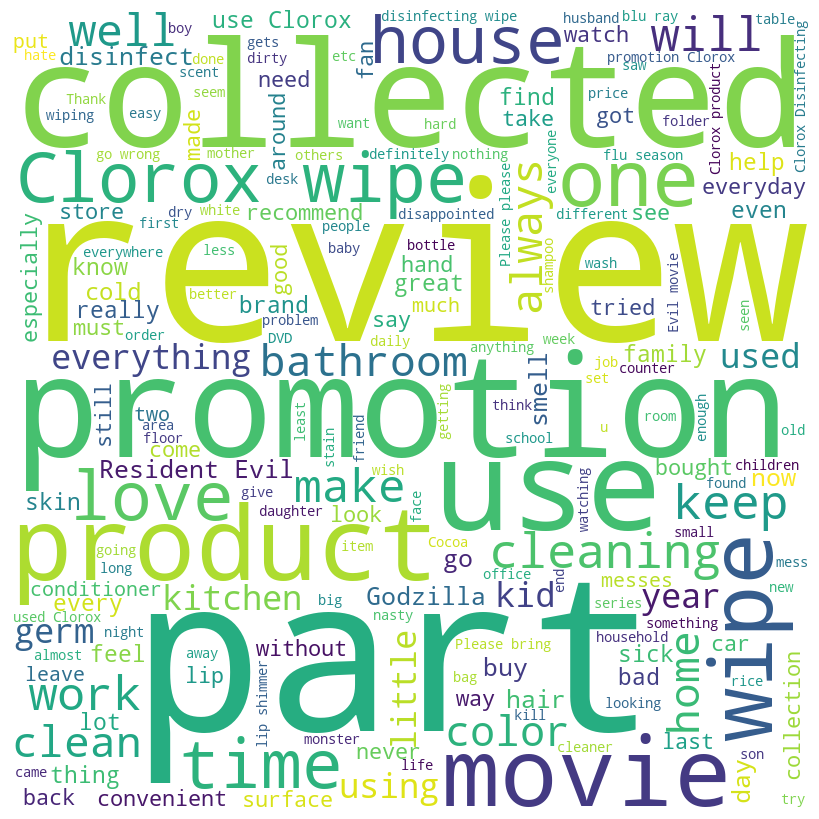

In [50]:
# Word cloud for the reviews_text
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(df['reviews_text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Observation:
---
From the world it is more evident that sentoment meeds to be cprrected to Positive for rating 4 and 5

In [23]:
# Change the sentiment to Positive for reviews_rating = 4,5
review_data.loc[(review_data['reviews_rating'].isin([4,5])), 'user_sentiment'] = 'Positive'


In [24]:
# Get the records where reviews_rating = 5 and user_sentiment = Negative
df = review_data[(review_data['reviews_rating'] .isin([4,5])) & (review_data['user_sentiment'] == 'Negative')][['reviews_rating', 'user_sentiment', 'reviews_text']]
df.shape

(0, 3)

In [53]:
df1.sample(10)

,reviews_rating,user_sentiment,reviews_text
21399,1,Positive,I've been using Nexxus Exxtra Gel for 30 years and loved the old formula because it provided great hold for my straight hair and was fragrance-free (at least to my sense of smell.) The new formula provides no hold and the scent gives me terrible headaches. Please bring back the old formula! Thank you.
28783,2,Positive,"I loved it. The ease of manipulation during styling, the hold, the texture, the finish... Everything you want for a piecey pixie.BUT it sticks tenaciously to the hair like tree sap or gum. So much so that it is impossible to wash off. For that, this first try might be my last if I can't find a way to still get back my clean hair at the end of the day."
22426,1,Positive,New formula does not control oil balance of scalp and hair. Old formula was only shampoo I found to manage the moisture balance of my hair.
21598,1,Positive,"I have naturally curly hair and finally found a wonderful product with the Nexxus Exxtra Gel many, many years ago. Recently, the formula has changed and the hold is terrible!! My hair is a mess and the gel offers no help. PLEASE bring back the old gel formula!!"
21435,1,Positive,So disappointed in the new formula. It gives my fine and body less hair no hold and leaves my hair filmy and flat. This product no longer works well when using a curling or flat iron. I want the old formula back. Why change a product that has worked great for years. So disappointed I bought two tubes of this as I didn't ever want to run out of the original product. I will be looking for something else. Please email me if you change the formula back to the original.
15337,2,Positive,"Keebler Chips Deluxe Soft 'N Chewy Cookies are soft and chewy, but they lack flavor. We bought 2 packages of these and thought that maybe it was just that package that was bad, but both packages were flavorless. Just wasn't what we were expecting from Keebler."
56,1,Positive,"I am so disappointed! I have used this product for years because of it's soft smell and great results. The new formula feels greasy, smells awful and I don't feel like my skin looks as toned and wrinkle free anymore. This was a five star product for so many years...why change it Please bring back the old formula."
21671,1,Positive,I have used the gel for 20 plus years...the new/revised product does not work nearly as well nor do I like the fragrance.
26262,2,Positive,"Ok, for everybody out there. Stargate is a great movie. If you haven't seen it, you need to. If you have, then you already know what I'm talking about. My purpose here, though, is not to tout a great movie, but blast Lion's Gate for releasing such a poor quality product. I own a good collection of Blu-Ray movies and they all look great on my 1080p Mitsubishi on a PS3. Stargate, however, looks like they ripped a VHS cassette tape and put it on a Blu-Ray disk. Sad. So, for my opinion, I say that your money is better spent on the DVD version. It will be cheaper and look the same."
21296,1,Positive,I have used the Nexxus gel for many years but was disappointed with the scent of the new product. Unfortunately the scent is too strong for my taste and I will be finding a new hair gel. I wish I would have known about the change because I would have stocked up on the old version.


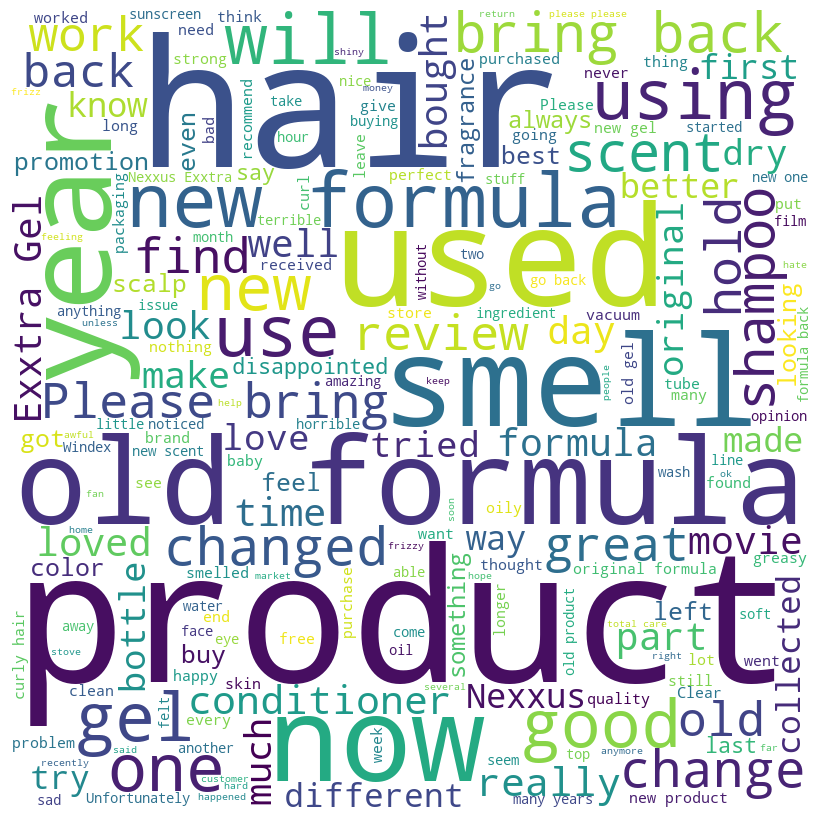

In [54]:
# Similar action to be taken for reviews_rating = 1,2
# Before have a look  on word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(df1['reviews_text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [25]:
# Set sentiment = Negative for reviews_rating = 1,2
review_data.loc[(review_data['reviews_rating'].isin([1,2])), 'user_sentiment'] = 'Negative'


In [26]:
# Get the records where reviews_rating = 1 and 2 and user_sentiment = Positive
df1 = review_data[(review_data['reviews_rating'].isin([1, 2])) & (review_data['user_sentiment'] == 'Positive')][['reviews_rating', 'user_sentiment', 'reviews_text']]
df1.shape


(0, 3)

In [57]:
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,categoriescategory_freq
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NA,NA,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive,movies music booksmusicrbmovies tvmovie bundles collectionscds vinylrap hiphopbassmusic cd vinylraphiphopmainstream rappop rap
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NA,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive,foodpackaged foodssnackscrackerssnacks cookies chipsrice cakescakes
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NA,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,foodpackaged foodssnackscrackerssnacks cookies chipsrice cakescakes
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,NaN,NaN,rebecca,Negative,personal caremedicine cabinetlubricantspermicidehealthsexual wellnesslubricants
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative,personal caremedicine cabinetlubricantspermicidehealthsexual wellnesslubricants


##  2. Data Cleaning
---
Although some of the data cleaning we have performed during EDA lets have a detailed look here

In [58]:
# Percenatge of null values in the data set
review_data.isnull().sum()/len(review_data)*100

id                          0.000000
brand                       0.000000
categories                  0.000000
manufacturer                0.470000
name                        0.000000
reviews_date                0.153333
reviews_didPurchase         0.000000
reviews_doRecommend         0.000000
reviews_rating              0.000000
reviews_text                0.000000
reviews_title               0.633333
reviews_userCity           93.570000
reviews_userProvince       99.433333
reviews_username            0.210000
user_sentiment              0.000000
categoriescategory_freq     0.000000
dtype: float64

In [59]:
# With huge number of null values we can drop the columns reviews_userCity and reviews_userProvince
review_data.drop(['reviews_userCity', 'reviews_userProvince'], axis=1, inplace=True)
review_data.isnull().sum()/len(review_data)*100

id                         0.000000
brand                      0.000000
categories                 0.000000
manufacturer               0.470000
name                       0.000000
reviews_date               0.153333
reviews_didPurchase        0.000000
reviews_doRecommend        0.000000
reviews_rating             0.000000
reviews_text               0.000000
reviews_title              0.633333
reviews_username           0.210000
user_sentiment             0.000000
categoriescategory_freq    0.000000
dtype: float64

##  3. Text Preprocessing
---
As part of preprocessing we can do the below operations

1.  lower case
2.  remove noise by performing removal of special characters and punctuations
3.  lemmatization
4.  stop word removal


In [27]:
# For sentiment analysis we dont need all the columns, so we can drop the columns that are not required
review_data_sentiment = review_data[['id', 'reviews_text', 'user_sentiment', 'reviews_rating', 'reviews_title']]
review_data_sentiment.head()

,id,reviews_text,user_sentiment,reviews_rating,reviews_title
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,5,Just Awesome
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,Positive,5,Good
2,AV14LG0R-jtxr-f38QfS,Good flavor.,Positive,5,Good
3,AV16khLE-jtxr-f38VFn,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Negative,1,Disappointed
4,AV16khLE-jtxr-f38VFn,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,1,Irritation


In [28]:
# We see that the reviews_title are not going to add much value to the sentiment analysis, so we can drop the column
review_data_sentiment.drop('reviews_title', axis=1, inplace=True)
review_data_sentiment.head()

,id,reviews_text,user_sentiment,reviews_rating
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,5
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,Positive,5
2,AV14LG0R-jtxr-f38QfS,Good flavor.,Positive,5
3,AV16khLE-jtxr-f38VFn,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Negative,1
4,AV16khLE-jtxr-f38VFn,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,1


In [29]:
review_data_sentiment.shape

(30000, 4)

In [30]:
# Create a function that converts the sentiment to 1 for Positive and 0 for Negative
def sentiment_to_numeric(sentiment):
    if sentiment == 'Positive':
        return 1
    else:
        return 0


In [31]:
review_data_sentiment['user_sentiment'] = review_data_sentiment['user_sentiment'].apply(sentiment_to_numeric)
review_data_sentiment.head()

,id,reviews_text,user_sentiment,reviews_rating
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,5
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,1,5
2,AV14LG0R-jtxr-f38QfS,Good flavor.,1,5
3,AV16khLE-jtxr-f38VFn,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",0,1
4,AV16khLE-jtxr-f38VFn,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,1


In [32]:
# Create a function to lower case the text
def lower_case(text):
    return text.lower()


In [33]:
# Create a function to Remove the stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stop_words(text):
    return " ".join([word for word in text.split() if word not in stop])



In [34]:
# Create a function to Remove the special characters
def remove_special_characters(text):
    return re.sub(r'[^\w\s]','',text)


In [35]:
# Create  a function to perform lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet data (if not already downloaded)
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sakpa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
# Create a function named as preprocess_text that will call all the above functions
def preprocess_text(text):
    text = lower_case(text)
    text = remove_stop_words(text)
    text = remove_special_characters(text)
    text = lemmatize_text(text)
    return text


In [37]:
# Call the preprocess_text function on the reviews_text and store the result in a new column reviews_text_processed
review_data_sentiment['reviews_text_processed'] = review_data_sentiment['reviews_text'].apply(preprocess_text)
review_data_sentiment.head()

,id,reviews_text,user_sentiment,reviews_rating,reviews_text_processed
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,5,love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,1,5,good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Good flavor.,1,5,good flavor
3,AV16khLE-jtxr-f38VFn,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",0,1,read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean up pleasant especially since lacked captivating sensation expecting im disappointed paid much lube use again could use normal personal lubricant 1 less money 2 less mess
4,AV16khLE-jtxr-f38VFn,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,1,husband bought gel u gel caused irritation felt like burning skin recommend gel


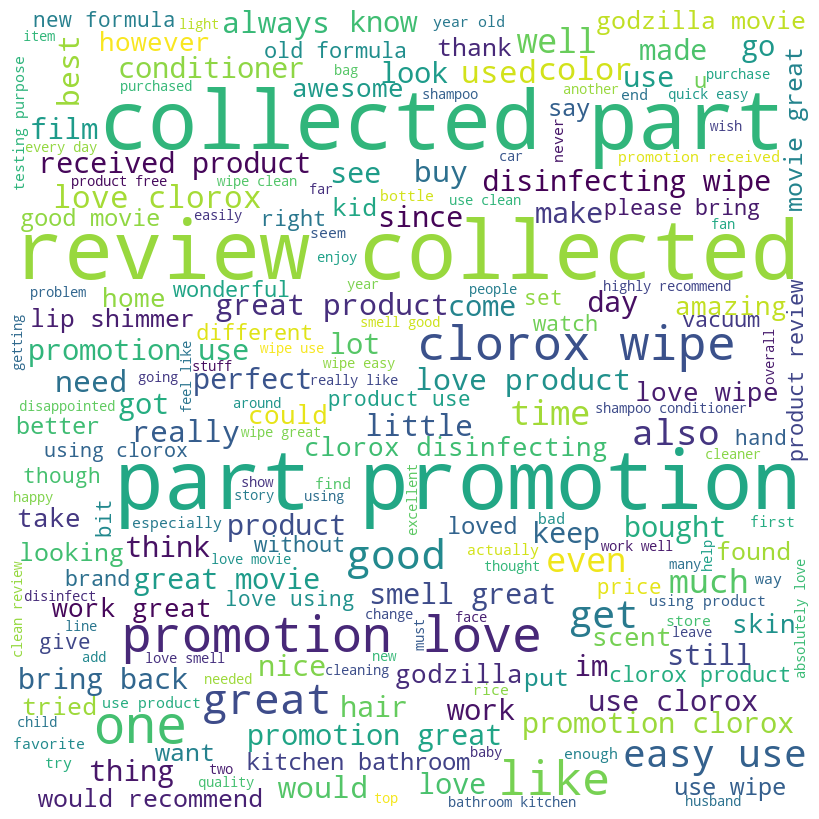

In [71]:
# Get a word cloud for the reviews_text_processed
stopwords_set = set(stopwords.words('english'))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_set,
                min_font_size = 10).generate(' '.join(review_data_sentiment['reviews_text_processed']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [38]:
# Create bigrams on the reviews_text_processed
from nltk.util import ngrams

ngrams_list = []
for text in review_data_sentiment['reviews_text_processed']:
    ngrams_list.append(list(ngrams(text.split(), 2)))

In [73]:
# Get the top 10 bigrams
bigrams = [bigram for sublist in ngrams_list for bigram in sublist]
bigrams_freq = pd.Series(bigrams).value_counts().head(20)
bigrams_freq

(review, collected)       8743
(part, promotion)         8743
(collected, part)         8743
(clorox, wipe)            1989
(easy, use)               1278
(love, clorox)             905
(great, product)           803
(love, product)            789
(disinfecting, wipe)       688
(great, movie)             654
(smell, great)             615
(love, it)                 611
(use, clorox)              558
(bring, back)              518
(received, product)        518
(clorox, disinfecting)     507
(love, wipe)               488
(lip, shimmer)             463
(work, great)              462
(godzilla, movie)          460
dtype: int64

## 4.   Feature Extraction
---

In [39]:
# Our data set review_data_sentiment is ready for sentiment analysis. We will create a classification model and that can only work on numerical data.
# We use spacy to convert the text to numerical data


import spacy

# Install the spaCy model with word embeddings
!python -m spacy download en_core_web_md



     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     --------------------------------------- 0.0/42.8 MB 162.5 kB/s eta 0:04:24
     --------------------------------------- 0.0/42.8 MB 245.8 kB/s eta 0:02:54
     --------------------------------------- 0.1/42.8 MB 403.5 kB/s eta 0:01:46
     --------------------------------------- 0.2/42.8 MB 697.2 kB/s eta 0:01:02
      --------------------------------------- 0.6/42.8 MB 1.9 MB/s eta 0:00:23
      --------------------------------------- 1.0/42.8 MB 2.9 MB/s eta 0:00:15
     - -------------------------------------- 1.1/42.8 MB 2.8 MB/s eta 0:00:15
     - -------------------------------------- 1.8/42.8 MB 4.0 MB/s eta 0:00:11
     - -------------------------------------- 2.1/42.8 MB 4.3 MB/s eta 0:00:10
     -- ------------------------------------- 2.6/42.8 MB 4.7 MB/s eta 0:00:09
     -- ------------------------------------- 2.9/42.8 MB 5.1 

In [40]:
# Load the spaCy model with word embeddings
nlp = spacy.load("en_core_web_md")

In [41]:
# Process each review text and get the vector of each review text
review_vectors = [nlp(text).vector for text in review_data_sentiment['reviews_text_processed']]

In [42]:
# Add the review vectors to the data frame
review_data_sentiment['review_vectors'] = review_vectors
review_data_sentiment.head(2)

,id,reviews_text,user_sentiment,reviews_rating,reviews_text_processed,review_vectors
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,5,love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy,"[0.29218793, 1.7194191, -0.9184526, -1.4609263, 0.65299153, 0.18658528, 1.8159469, 2.402642, -2.2862217, -0.41546828, 3.5901988, -0.50498223, -2.578839, 2.223684, 2.0211487, -1.2446983, 1.5117178, 0.13886301, -0.7471027, 1.1658047, 0.7257464, 2.004652, 0.5646058, -4.2226233, -0.045086753, 0.2649779, -2.097475, -0.8973248, 1.5572288, 1.1328189, -0.5707443, -0.22474156, -0.7973661, -2.0683334, 0.888921, 0.623459, -0.82223165, 1.2460144, 1.5495114, -0.17795344, 0.18850194, -0.6931217, 1.9146954, 0.16178629, 0.052982155, 2.0370207, -1.1997463, -1.822263, 0.60559684, 1.1829306, 0.3253537, -0.15426995, -1.1322373, -1.3674288, -0.6007438, -0.24866845, 1.5909164, 0.9501405, 2.0746996, 2.2399247, 3.7304628, -0.052541405, -0.105914794, -1.6966842, -0.07713629, 1.7373146, -3.0790882, -3.4128997, -0.49217576, 2.7310133, -1.8445802, -0.5299341, 0.49053946, -1.5566478, -0.25454214, 3.7523756, -1.0431769, 0.5328401, -0.6391447, 0.9473322, -2.0700238, 0.17819376, 2.049072, -1.6601, 1.2056664, 1.5130593, 2.3388932, -2.103076, -1.6425327, 0.35075685, -1.7007496, 2.2009594, -0.6521618, -2.2292488, 1.1559151, -1.8820825, 2.1406803, -2.7917137, 0.39649737, -1.6014242, ...]"
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,1,5,good flavor review collected part promotion,"[-0.88077664, -2.4998915, -0.9158817, 0.47458836, 3.5790331, -0.5640316, 1.8699783, 1.8628569, -2.6720898, -0.10801498, 6.076691, 0.9999333, -3.8747349, 1.7456499, 0.3006233, 0.9480233, 3.3804665, 1.344535, -0.36585832, -0.29862, -2.3475132, 0.97949004, -2.3229167, 0.7539234, -1.01349, 0.56727, -4.0504336, 0.5484833, -0.5752017, 2.5446117, 1.6560999, 0.23072667, -1.31413, 0.08681667, 0.674045, 0.047966678, 0.42961335, 0.78353167, 0.38998333, -0.011346619, 0.65515, 0.87357503, -0.875565, 0.92868, -0.82905, 1.8016995, 4.48885, -2.023496, -0.1226717, 0.22819965, 0.5055917, 1.5052484, 0.15478934, -2.6491668, -1.1404499, -0.59748, -3.1344998, 1.0314797, 2.5168536, -1.3269367, 2.0466883, 0.13032335, -0.13890165, -0.66133666, 2.2055, 3.3643665, -1.8134289, -4.15198, 1.5926933, 2.0920134, -0.29271835, -0.059021685, -1.4062166, -1.85785, 0.08663497, 1.8719101, -1.2117265, 1.8640116, 0.12950169, 1.0341634, -3.06726, 0.53747165, -0.11186666, -0.31058833, 0.25544664, 0.31441835, 0.09841999, -2.3198583, 0.2469217, 0.18561001, -0.32984495, 1.9576501, 1.7582649, -3.752885, 1.2234733, -0.58965343, 1.06767, -2.6132183, -0.31249663, 0.39788005, ...]"


In [46]:
import pickle
import os

# Pickle file path for the review_data_sentiment
if IN_COLAB:
    pickle_file_path = '/content/drive/MyDrive/Recommendation System Project/review_data_sentiment.pkl'
else:
    pickle_file_path = os.path.join(os.getcwd(), 'review_data_sentiment.pkl')
    

# Dump the review_data_sentiment in a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(review_data_sentiment, file)

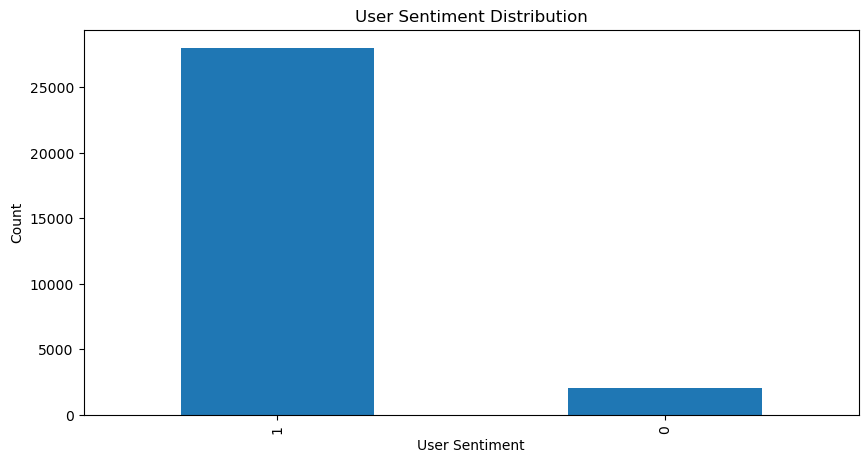

In [79]:
# We have seen it earkier, lets have another look at the distribution of the user_sentiment
review_data_sentiment['user_sentiment'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('User Sentiment Distribution')
plt.xlabel('User Sentiment')
plt.ylabel('Count')
plt.show()

We can see a clear and significant clas imbalance problem here as the number of postive sentiments are too high in the data set. This will eventually indulge biases while creating a classification model. So we have to treat the class imbalance issue.

#### Performing Train Test Split


In [80]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split


X = np.array(review_data_sentiment['review_vectors'].to_list())
y = np.array(review_data_sentiment['user_sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Shape of the training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (24000, 300)
X_test shape: (6000, 300)
y_train shape: (24000,)
y_test shape: (6000,)


#### Now handle class imbalance handling using SMOTE

In [82]:
!pip install imbalanced-learn

In [83]:
# class imbalance handling using SMOTE oversampling


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Shape of the training and testing data
print(f"X_train_res shape: {X_train_res.shape}")
print(f"y_train_res shape: {y_train_res.shape}")



X_train_res shape: (44712, 300)
y_train_res shape: (44712,)


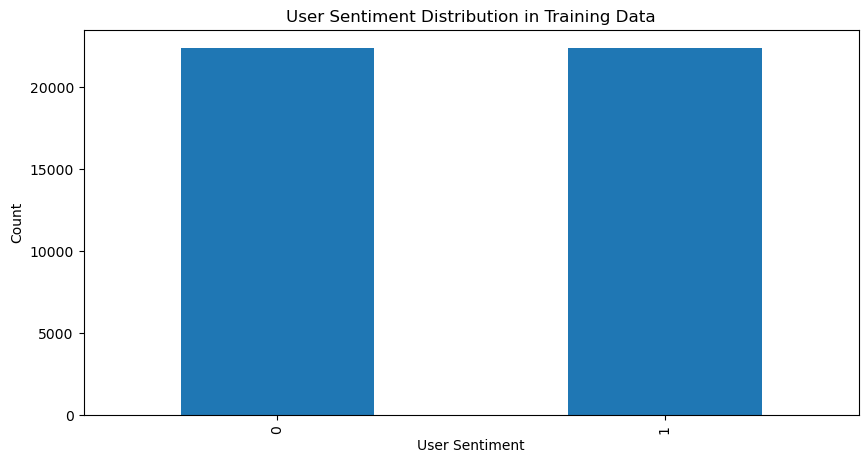

In [84]:
# Value counts of the user_sentiment in the training data
pd.Series(y_train_res).value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('User Sentiment Distribution in Training Data')
plt.xlabel('User Sentiment')
plt.ylabel('Count')
plt.show()

### Thats perfect!! we have controlled the class imbalance problem through over samping mechanism

###  5. Training a text classification model:
---
We will build  below three models
1. Logistic regression
2. Random forest
3. XGBoost

In [85]:
# Model building for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score


In [86]:
# Create a function to evaluate different classification models
def evaluate_model(model,  X_test, y_test):

    # Predict the test data
    y_pred = model.predict(X_test)

    # Calculate and Print the accuracy score
    accuracy_score_value = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy_score_value}")

    # Calculate and Print the classification report
    classification_report_value = classification_report(y_test, y_pred)
    print(f"Classification Report: \n{classification_report_value}")

    # Calculate and Print the confusion matrix
    confusion_matrix_value = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix: \n{confusion_matrix_value.tolist()}")

    # Plot the confusion matrix
    sns.heatmap(confusion_matrix_value, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show


    # Calculate and Print the ROC AUC score
    roc_auc_score_value = roc_auc_score(y_test, y_pred)
    print(f"ROC AUC Score: {roc_auc_score_value}")

    # Calculate and Print the Precision score
    precision_score_value = precision_score(y_test, y_pred)
    print(f"Precision Score: {precision_score_value}")

    # Calculate and Print the Recall score
    recall_score_value = recall_score(y_test, y_pred)
    print(f"Recall Score: {recall_score_value}")

    # Calculate and Print the F1 score
    f1_score_value = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1_score_value}")

    # Return the ebaluation metrics in a list

    evaluation_metrics = {
                          'Accuracy': accuracy_score_value,
                          'Classification Report': classification_report_value,
                          'Confusion Matrix': confusion_matrix_value,
                          'ROC AUC Score': roc_auc_score_value,
                          'Precision Score': precision_score_value,
                          'Recall Score': recall_score_value,
                          'F1 Score': f1_score_value,
                          'model': model
                          }





    return evaluation_metrics



In [87]:
# Create a logistic regression model

logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

Accuracy: 0.8828333333333334
Classification Report: 
              precision    recall  f1-score   support

           0       0.33      0.83      0.47       380
           1       0.99      0.89      0.93      5620

    accuracy                           0.88      6000
   macro avg       0.66      0.86      0.70      6000
weighted avg       0.95      0.88      0.90      6000

Confusion Matrix: 
[[315, 65], [638, 4982]]
ROC AUC Score: 0.8577121183742273
Precision Score: 0.9871210620170399
Recall Score: 0.8864768683274021
F1 Score: 0.934095809505953


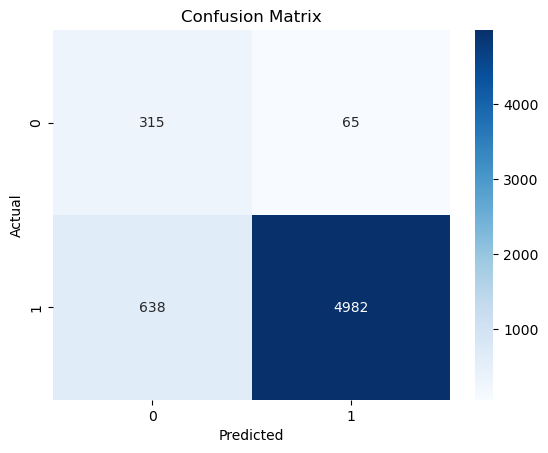

In [88]:
# Evaluate the model
logistic_model_perf = evaluate_model(logistic_model, X_test, y_test)

In [89]:
# Model building for Random Forest
from sklearn.ensemble import RandomForestClassifier

In [90]:
# Create a base Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

Accuracy: 0.9536666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.56      0.61       380
           1       0.97      0.98      0.98      5620

    accuracy                           0.95      6000
   macro avg       0.81      0.77      0.79      6000
weighted avg       0.95      0.95      0.95      6000

Confusion Matrix: 
[[213, 167], [111, 5509]]
ROC AUC Score: 0.7703877130548792
Precision Score: 0.9705778717406625
Recall Score: 0.9802491103202847
F1 Score: 0.9753895184135978


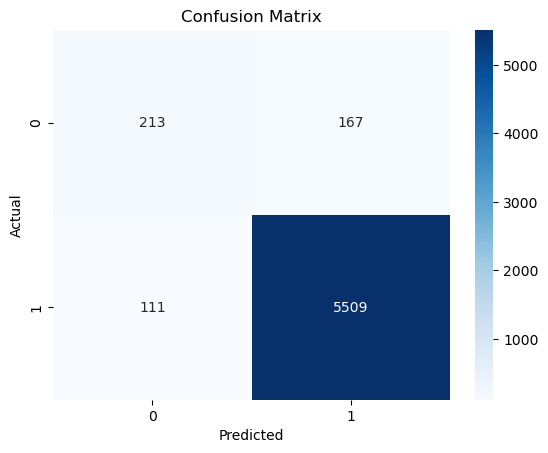

In [91]:
# Evaluate model performance
random_forest_model_perf = evaluate_model(random_forest_model, X_test, y_test)

In [92]:
# Hyper parameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],


}





In [93]:
# Import random search
from sklearn.model_selection import RandomizedSearchCV

In [94]:
# Create a random search object
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = random_forest_model, param_distributions = param_grid,
                                   n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)

In [ ]:
%time
# Fit the grid search object to the data, since we have retrieved the best params one, commenting out for next runs. Else it takes a lot of timne
# random_search.fit(X_train_res, y_train_res)



In [ ]:
# Get the best hyperparameters
#random_search.best_params_


#### Best parameters for random forest after RandomSearch CV
`{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': False}`

In [ ]:
# Use the best hyperparameters to create the final model

random_forest_model_final = RandomForestClassifier(n_estimators = 200,
                                                   min_samples_split = 2,
                                                   min_samples_leaf = 1,
                                                   max_features = 'sqrt',
                                                   max_depth = 30,
                                                   criterion = 'entropy',
                                                   bootstrap = False,
                                                   random_state=42)

random_forest_model_final.fit(X_train_res, y_train_res)

In [ ]:
# Now build a random forest with the best params, this is commented as we dont want to run the CV random search every time

# random_forest_model_final = RandomForestClassifier(**random_search.best_params_, random_state=42)
# random_forest_model_final.fit(X_train_res, y_train_res)


In [ ]:
# Evaluate model performance
random_forest_model_final_perf = evaluate_model(random_forest_model_final, X_test, y_test)

#### `XGBoost`

In [96]:
# Create a XGBoost model

%pip install xgboost
from xgboost import XGBClassifier

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.1/124.9 MB 273.8 kB/s eta 0:07:36
   ---------------------------------------- 0.1/124.9 MB 350.1 kB/s eta 0:05:57
   ---------------------------------------- 0.2/124.9 MB 655.9 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 655.9 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 655.9 kB/s eta 0:03:11
   -------------------

In [ ]:

# Fit the model on the training data
xgb_model.fit(X_train_res, y_train_res)



In [ ]:
# Evaluate the model
xgb_model_perf = evaluate_model(xgb_model, X_test, y_test)

#### Tries with hyper parameter tuning but that takes too much of time, hence this notebook does not cover the hyperparameter tuning of the XGBoost model.

In [ ]:
# reate a dataframe with the output of each model


# Create a dictionary to store the model performance metrics
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'Random Forest (Tuned)', 'XGBoost'],
    'Accuracy': [logistic_model_perf['Accuracy'], random_forest_model_perf['Accuracy'], random_forest_model_final_perf['Accuracy'], xgb_model_perf['Accuracy']],
    'Precision': [logistic_model_perf['Precision Score'], random_forest_model_perf['Precision Score'], random_forest_model_final_perf['Precision Score'], xgb_model_perf['Precision Score']],
    'Recall': [logistic_model_perf['Recall Score'], random_forest_model_perf['Recall Score'], random_forest_model_final_perf['Recall Score'], xgb_model_perf['Recall Score']],
    'F1_Score': [logistic_model_perf['F1 Score'], random_forest_model_perf['F1 Score'], random_forest_model_final_perf['F1 Score'], xgb_model_perf['F1 Score']],
    'ROC_AUC': [logistic_model_perf['ROC AUC Score'], random_forest_model_perf['ROC AUC Score'], random_forest_model_final_perf['ROC AUC Score'], xgb_model_perf['ROC AUC Score']]
}

# Create a pandas DataFrame from the dictionary
model_df = pd.DataFrame(model_performance)

# Display the DataFrame
model_df

### Considering the above table we see XGBoost is better as it shows better F1 score, ROC_AUC and accuracy
#### We will now dump the XGboost model weights using pickl

In [ ]:
#  Use pickl to dump the model weights for XGboost

import pickle


# Save the model to a file
if IN_COLAB:
    pkl_path = '/content/drive/MyDrive/Recommendation System Project/Pickle'
else:
    pkl_path = '/Pickle'
   

with open(pkl_path, 'wb') as file:
    pickle.dump(xgb_model, file)



##  6. Recommendation System

We build the below two recommendation system
1. User-based recommendation system

2. Item-based recommendation system

In [128]:
# Data import
if IN_COLAB:
    review_reco = pd.read_csv('/content/drive/MyDrive/Recommendation System Project/sample30.csv')
else:
    review_reco = pd.read_csv('sample30.csv')
    
review_reco.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [129]:
# We do not need all the columns
# We can continue with id,reviews_username,reviews_rating
review_reco = review_reco[['id','reviews_username','reviews_rating','name']]
review_reco.head()

,id,reviews_username,reviews_rating,name
0,AV13O1A8GV-KLJ3akUyj,joshua,5,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
2,AV14LG0R-jtxr-f38QfS,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,rebecca,1,K-Y Love Sensuality Pleasure Gel
4,AV16khLE-jtxr-f38VFn,walker557,1,K-Y Love Sensuality Pleasure Gel


In [130]:
# Lets have a look if there any null values in review_reco

review_reco.isnull().sum()

id                   0
reviews_username    63
reviews_rating       0
name                 0
dtype: int64

In [131]:
# We see there are 63 rows where there is no reviews_username, lets cgeck the distribution of id where reviews_username is null
review_reco[review_reco['reviews_username'].isnull()]['id'].value_counts()

AVpf3VOfilAPnD_xjpun    20
AVpe9W4D1cnluZ0-avf0    13
AVpfPPkEilAPnD_xX3cP    11
AVpe38Uy1cnluZ0-YuJR     3
AVpe-ltS1cnluZ0-bL8w     2
AVpe_y-I1cnluZ0-bmvh     2
AVpfNfEMLJeJML434uf-     2
AVpfjauJLJeJML43_TKe     1
AVpfOmKwLJeJML435GM7     1
AVpf--o9LJeJML43G_Fq     1
AVpfm8yiLJeJML43AYyu     1
AVpe_N91LJeJML43z4jD     1
AVpfIvbgLJeJML433Kph     1
AVpfgvkJLJeJML43-g1y     1
AVpfBSJgilAPnD_xTLf3     1
AVpe6C3WLJeJML43yApY     1
AVpfEqFbilAPnD_xUV28     1
Name: id, dtype: int64

In [132]:
# Divide the data into train test split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(review_reco, test_size=0.2, random_state=42)


In [133]:
train_data.shape, test_data.shape

((24000, 4), (6000, 4))

In [134]:
# Create a pivot of the training dataset where index will be each user and column will be the product, and each cell represents the rating
train_data_pivot = train_data.pivot_table(index='reviews_username', columns='id', values='reviews_rating', fill_value=0)
train_data_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00sab00,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01impala,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02dakota,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02deuce,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')


In [136]:
# Print the columns
review_reco.columns

Index(['id', 'reviews_username', 'reviews_rating', 'name'], dtype='object')

In [137]:
# Check for missing values

review_reco.isnull().sum()

id                   0
reviews_username    63
reviews_rating       0
name                 0
dtype: int64

In [138]:
# Drop the missing values for reviews_username
review_reco = review_reco.dropna(subset=['reviews_username'])
review_reco.shape

(29937, 4)

In [139]:
# Divide the data into train and test

train, test = train_test_split(review_reco, test_size=0.30, random_state=31)
print(train.shape)
print(test.shape)

(20955, 4)
(8982, 4)


### User and User recommedation system

In [140]:
# Create a matrix of reviews where the rows are the users and the columns are the products and the values are the ratings
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

In [141]:
df_pivot.sample(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
mrsprather16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bynom-de-guerre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stainlesssteelband,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
must_love_pugs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yeyo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nessa2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cozygirl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gastgirl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
crazycat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Creating dummy train & dummy test dataset
These dataset will be used for prediction
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset.

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [142]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [143]:
# The products not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)


In [144]:
# Convert the dummy train dataset into matrix format

dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'

).fillna(1)
dummy_train.sample(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
brianpa,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
dva1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
shoty71,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case]

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.



In [145]:
# Use adjusted cosimilarity to calculate the similarity between the users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation



In [146]:
# Create user product matrix

df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [147]:
df_pivot.iloc[0].sort_values(ascending=False)

id
AVpe59io1cnluZ0-ZgDU    3.0
AVpe41TqilAPnD_xQH3d    1.0
AV13O1A8GV-KLJ3akUyj    NaN
AV14LG0R-jtxr-f38QfS    NaN
AV16khLE-jtxr-f38VFn    NaN
                       ... 
AVpfshNsLJeJML43CB8q    NaN
AVpfthSailAPnD_xg3ON    NaN
AVpftikC1cnluZ0-p31V    NaN
AVpfv4TlilAPnD_xhjNS    NaN
AVpfvieo1cnluZ0-qdnu    NaN
Name: 00sab00, Length: 255, dtype: float64

In [148]:
# Normalising the rating of the product for each user around 0 mean
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.sample(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
savantinsd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mars57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cma28311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
# Calculate the cosine similarity between the users on df_subtracted
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Prediction User User

Perform prediction based on the corelation matrix

In [150]:
# Prediction of the ratings based on the user correlation , only cosiders the positive correlation

user_correlation[user_correlation<0]=0
user_correlation.shape

(18212, 18212)

In [151]:
# Now we have 2 metrices, one is the postive correlation between users and the other is the user product matrix
# We will use these 2 metrices to predict the ratings
# If we perform a dot product between these 2 metrices, we will get the predicted ratings for the products

user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 1.55829543, 3.20256308,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [152]:
user_predicted_ratings.shape

(18212, 255)

In [153]:
# user_predicted_ratings is the predicted ratings for the products by the users based on the user correlation
# But we need to consider only the products which are not rated by the user
# So we will multiply the predicted ratings with the dummy_train matrix

user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.059436,0.0,0.0,0.0,0.915079,0.0,0.0,...,0.545545,0.0,0.0,0.0,0.0,0.0,0.0,1.558295,3.202563,0.0
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
06stidriver,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [155]:
top20_recommendation

id
AV13O1A8GV-KLJ3akUyj    0.0
AVpfP-rELJeJML435jEN    0.0
AVpfLnfPLJeJML434HpK    0.0
AVpfM_ytilAPnD_xXIJb    0.0
AVpfMpZ51cnluZ0-f_L9    0.0
AVpfN6Z71cnluZ0-gZmO    0.0
AVpfNVsj1cnluZ0-gNQN    0.0
AVpfNWbPilAPnD_xXPR7    0.0
AVpfNc9cLJeJML434tza    0.0
AVpfNfEMLJeJML434uf-    0.0
AVpfNglu1cnluZ0-gQ7x    0.0
AVpfO5u71cnluZ0-guiN    0.0
AVpfOIrkilAPnD_xXgDG    0.0
AVpfOfIqLJeJML435D06    0.0
AVpfOmKwLJeJML435GM7    0.0
AVpfPKzxLJeJML435SYL    0.0
AVpfKhuv1cnluZ0-fSVr    0.0
AVpfPPkEilAPnD_xX3cP    0.0
AVpfPaoqLJeJML435Xk9    0.0
AVpfPjqKLJeJML435aZR    0.0
Name: 13ld, dtype: float64

#### Finding the Top 20 products that a user is most likely to purchase based on the ratings (user-user based recommendation)


In [ ]:
# Top 20 products for a random  user

top20_recommendation = user_final_rating.iloc[23].sort_values(ascending=False).head(20)
top20_recommendation

id
AV13O1A8GV-KLJ3akUyj    0.0
AVpfP-rELJeJML435jEN    0.0
AVpfLnfPLJeJML434HpK    0.0
AVpfM_ytilAPnD_xXIJb    0.0
AVpfMpZ51cnluZ0-f_L9    0.0
AVpfN6Z71cnluZ0-gZmO    0.0
AVpfNVsj1cnluZ0-gNQN    0.0
AVpfNWbPilAPnD_xXPR7    0.0
AVpfNc9cLJeJML434tza    0.0
AVpfNfEMLJeJML434uf-    0.0
AVpfNglu1cnluZ0-gQ7x    0.0
AVpfO5u71cnluZ0-guiN    0.0
AVpfOIrkilAPnD_xXgDG    0.0
AVpfOfIqLJeJML435D06    0.0
AVpfOmKwLJeJML435GM7    0.0
AVpfPKzxLJeJML435SYL    0.0
AVpfKhuv1cnluZ0-fSVr    0.0
AVpfPPkEilAPnD_xX3cP    0.0
AVpfPaoqLJeJML435Xk9    0.0
AVpfPjqKLJeJML435aZR    0.0
Name: 13ld, dtype: float64

In [158]:
review_reco

,id,reviews_username,reviews_rating,name
0,AV13O1A8GV-KLJ3akUyj,joshua,5,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
2,AV14LG0R-jtxr-f38QfS,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,rebecca,1,K-Y Love Sensuality Pleasure Gel
4,AV16khLE-jtxr-f38VFn,walker557,1,K-Y Love Sensuality Pleasure Gel
...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,laurasnchz,5,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz
29996,AVpfW8y_LJeJML437ySW,scarlepadilla,5,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz
29997,AVpfW8y_LJeJML437ySW,liviasuexo,5,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz
29998,AVpfW8y_LJeJML437ySW,ktreed95,5,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz


In [159]:
# Merge the top 20 products with the original dataset to get the product names 
top20_recommendation = pd.merge(top20_recommendation, review_reco[['id','name']], on='id', how='left')
top20_recommendation


,id,13ld,name
0,AV13O1A8GV-KLJ3akUyj,0.0,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AVpfP-rELJeJML435jEN,0.0,5302050 15/16 FCT/HOSE ADAPTOR
2,AVpfLnfPLJeJML434HpK,0.0,"Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201"
3,AVpfLnfPLJeJML434HpK,0.0,"Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201"
4,AVpfLnfPLJeJML434HpK,0.0,"Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201"
...,...,...,...
4676,AVpfPaoqLJeJML435Xk9,0.0,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd
4677,AVpfPjqKLJeJML435aZR,0.0,Voortman Sugar Free Fudge Chocolate Chip Cookies
4678,AVpfPjqKLJeJML435aZR,0.0,Voortman Sugar Free Fudge Chocolate Chip Cookies
4679,AVpfPjqKLJeJML435aZR,0.0,Voortman Sugar Free Fudge Chocolate Chip Cookies


#### Evaluation - user user recommendation
Here we will use the products already rated by the user

In [160]:
# Commmon users in train and test dataset
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1976, 4)

In [161]:
# Convert the common users into matrix format
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [162]:
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1h6Gu0glJLPUi8IjA_,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
# user_correlation as data frame

user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
# Replace the ids with user name to get the user correlation for the common users
user_correlation_df['reviews_username'] = df_pivot.index
user_correlation_df.set_index('reviews_username', inplace=True)
user_correlation_df.head()


,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
# now replace the ids with user name in the common user based matrix

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df.head

<bound method NDFrame.head of                   00sab00  01impala  02dakota  02deuce  06stidriver  08dallas  \
reviews_username                                                                
00sab00               1.0       0.0       0.0      0.0          0.0       0.0   
01impala              0.0       0.0       0.0      0.0          0.0       0.0   
02dakota              0.0       0.0       0.0      0.0          0.0       0.0   
02deuce               0.0       0.0       0.0      0.0          0.0       0.0   
06stidriver           0.0       0.0       0.0      0.0          0.0       0.0   
...                   ...       ...       ...      ...          ...       ...   
zuttle                0.0       0.0       0.0      0.0          0.0       0.0   
zwithanx              0.0       0.0       0.0      0.0          0.0       0.0   
zxcsdfd               0.0       0.0       0.0      0.0          0.0       0.0   
zyiah4                0.0       0.0       0.0      0.0          0.0       0.0  

In [166]:
common_user_names = common.reviews_username.tolist()

In [167]:
# Get the user correlation for the common users
common_user_correlation_df = user_correlation_df[user_correlation_df.index.isin(common_user_names)]
common_user_correlation_df.shape


(1660, 18212)

In [168]:
common_user_correlation_df1 = common_user_correlation_df.T[common_user_correlation_df.T.index.isin(common_user_names)]
common_user_correlation_df2 = common_user_correlation_df1.T
common_user_correlation_df2.head()

,1234,123charlie,37f5p,4cloroxl,50cal,7.87E+11,aac06002,abbey,abbi,abby,...,yesseniaw22,yeya,ygtz,yummy,zapman,zburt5,zebras,zippy,zitro,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
common_user_correlation_df2.shape

(1660, 1660)

In [170]:
# common_user_based_matrix - replace the NAN values with 0
common_user_based_matrix.fillna(0, inplace=True)



In [171]:
# Now we will multiply the common user based matrix with the user correlation for the common users
# This will give us the predicted ratings for the products by the common users

common_user_correlation_df2[common_user_correlation_df2<0] = 0
common_user_rating =  np.dot(common_user_correlation_df2,common_user_based_matrix.fillna(0))
common_user_rating

array([[0.28867513, 0.        , 0.        , ..., 2.5423759 , 1.44337567,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [172]:
dummy_test = common.copy()
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_test).fillna(0)
dummy_test

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Batherapy Natural Mineral Bath Sport Liquid, 16 oz",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zburt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zebras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zippy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)
common_user_pred_ratings

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Batherapy Natural Mineral Bath Sport Liquid, 16 oz",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zburt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zebras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zippy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user.

For RMSE, normalising the rating to (1,5) range.

In [174]:
from sklearn.preprocessing import MinMaxScaler


X  = common_user_pred_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [175]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')


In [176]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [177]:
from numpy import *

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.5535430316595282


In [239]:
# We must store the model uisng pickle
if IN_COLAB:
    filename = '/content/drive/MyDrive/Recommendation System Project/Pickle/user_user_recommendation_model.pkl'
else:
    filename = 'Pickle/user_user_recommendation_model.pkl'    
pickle.dump(user_final_rating, open(filename, 'wb'))



### Fine-Tuning the Recommendation System and Recommendation of Top 5 Products
---
Predicted the sentiment (positive or negative) of all the reviews in the train data set of the top 20 recommended products for a user. For each of the 20 products recommended, found the percentage of positive sentiments for all the reviews of each product. Filtered out the top 5 products with the highest percentage of positive reviews

In [201]:
# Load the model from disk
import pickle
import os

if IN_COLAB:
    filename = '/content/drive/MyDrive/Recommendation System Project/Pickle/xgb_model.pkl'
else:
    filename = 'Pickle/xgb_model.pkl'  # Corrected the path

if os.path.exists(filename):
    sentiment_model = pickle.load(open(filename, 'rb'))
else:
    print(f"File not found: {filename}")


In [230]:
review_data_sentiment.head(1)

,id,reviews_text,user_sentiment,reviews_rating,reviews_text_processed,review_vectors
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,5,love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy,"[0.29218793, 1.7194191, -0.9184526, -1.4609263, 0.65299153, 0.18658528, 1.8159469, 2.402642, -2.2862217, -0.41546828, 3.5901988, -0.50498223, -2.578839, 2.223684, 2.0211487, -1.2446983, 1.5117178, 0.13886301, -0.7471027, 1.1658047, 0.7257464, 2.004652, 0.5646058, -4.2226233, -0.045086753, 0.2649779, -2.097475, -0.8973248, 1.5572288, 1.1328189, -0.5707443, -0.22474156, -0.7973661, -2.0683334, 0.888921, 0.623459, -0.82223165, 1.2460144, 1.5495114, -0.17795344, 0.18850194, -0.6931217, 1.9146954, 0.16178629, 0.052982155, 2.0370207, -1.1997463, -1.822263, 0.60559684, 1.1829306, 0.3253537, -0.15426995, -1.1322373, -1.3674288, -0.6007438, -0.24866845, 1.5909164, 0.9501405, 2.0746996, 2.2399247, 3.7304628, -0.052541405, -0.105914794, -1.6966842, -0.07713629, 1.7373146, -3.0790882, -3.4128997, -0.49217576, 2.7310133, -1.8445802, -0.5299341, 0.49053946, -1.5566478, -0.25454214, 3.7523756, -1.0431769, 0.5328401, -0.6391447, 0.9473322, -2.0700238, 0.17819376, 2.049072, -1.6601, 1.2056664, 1.5130593, 2.3388932, -2.103076, -1.6425327, 0.35075685, -1.7007496, 2.2009594, -0.6521618, -2.2292488, 1.1559151, -1.8820825, 2.1406803, -2.7917137, 0.39649737, -1.6014242, ...]"


In [235]:
# Create a function that will take the user name and return the embedding of the top 20 recommended product's review text
# User data frame review_data_sentiment as it already has the emdeddings for each review text 
# We will use the user_final_rating matrix to get the top 20 recommended products for the user
# We will then get the embeddings of the review text for the top 20 products
# We will return the embeddings of the review text for the top 20 products

def get_user_recommendation_embeddings(user_name):
    # Get the top 20 recommended products for the user
    top20_products = user_final_rating.loc[user_name].sort_values(ascending=False).head(20)

    # Get the names of the top 20 products and the embeddings of the review text for the top 20 products and create a data frame
    top20_products_df = pd.merge(top20_products, review_data_sentiment[['id', 'review_vectors']], left_on='id', right_on='id', how='left')

    # Use the sentiment_model to predict the sentiment of the review text
    top20_products_df['sentiment_predicted'] = sentiment_model.predict(top20_products_df['review_vectors'].to_list())

    # Return the top 20 products data frame where the sentiment is positive
    top20_products_df = top20_products_df[top20_products_df['sentiment_predicted'] == 1]

    # For each id in top20_products_df check the percentage of psitive sentiment in review_data_sentiment
    top20_products_df['positive_sentiment_percentage'] = top20_products_df['id'].apply(lambda x: review_data_sentiment[review_data_sentiment['id'] == x]['user_sentiment'].mean())

    # Sort the top20_products_df based on the positive_sentiment_percentage and return top 5 products
    top20_products_df = top20_products_df.sort_values(by='positive_sentiment_percentage', ascending=False).head(5)

    return top20_products_df[['id', 'name','positive_sentiment_percentage']]



In [237]:
get_user_recommendation_embeddings('joshua')

,id,joshua,review_vectors,sentiment_predicted,positive_sentiment_percentage
16447,AVpfQtEm1cnluZ0-hUpe,0.825723,"[-1.1058955, 0.8610089, -2.8609061, -1.3280845, -0.055655584, -0.45248434, 1.5439544, 1.3922545, -3.619052, -0.18868777, 5.1977735, 0.71714675, -2.3216321, 1.7072434, 0.16050345, -1.0817866, 1.8878112, -1.0455811, -0.12751667, -1.4419378, -0.10447666, 1.3823222, -1.6488177, -0.6780198, -1.0069067, -0.13022116, -1.5256656, -1.7165197, -0.76083225, 1.3255098, 1.8923067, -0.1772912, -1.1462672, -1.7005903, 2.0569422, -0.8632635, 1.4654121, 1.9211898, 3.8010335, 4.7588677, -1.0381067, 1.3431225, 2.2519455, -0.112336904, -0.5324544, 2.0731766, 2.3589098, -2.1695333, -0.4216889, 0.49060106, 1.3328726, 0.5399045, 0.69226336, -4.906101, -2.885421, 1.6666278, 0.17253669, 1.3278689, 3.8938322, 2.2300968, 0.7826412, 1.39441, -0.23147996, -3.5882444, 0.4308855, 1.2272533, -1.3275867, -1.6446989, -0.89599776, 2.49446, 0.08710114, 1.1814799, -0.71896666, -0.028524479, -0.6926522, 2.614667, -0.9304712, 0.18742223, -0.1341111, 0.54646105, -2.8130536, -0.6181956, 2.2176166, 0.6407522, -0.14841011, -2.2536488, -0.27079332, -0.7285111, 0.5512333, 0.4732344, -1.1955421, -0.12619826, 0.55157995, -2.5974889, 0.6511878, -0.72239447, 1.4592102, -1.8713112, -0.7122858, -1.1809912, ...]",1,1.0
16455,AVpfQtEm1cnluZ0-hUpe,0.825723,"[0.24141, -3.361, -5.1285, -2.2161, 3.1913, -0.9775, 3.7953, 5.4905, -4.5822, -1.3638, 6.8389, 2.8193, -5.0399, 1.7731, 3.0924, 3.8568, -0.0048292, 0.61336, 0.54745, 0.64684, -2.1837, 3.1258, 2.5117, -3.1735, 4.8022, 0.70461, -4.451, 1.6519, -0.3734, 4.6075, 1.4047, -5.3579, -0.14602, -2.2772, -0.33852, -1.4485, -1.6969, 1.5334, 1.4347, -0.53555, 0.45217, 6.8612, 0.96476, -6.1322, -0.61341, 3.0973, 0.91187, -1.9985, -0.2649, 5.8649, -1.1576, -0.51955, -0.11216, -2.2832, -0.94881, 1.5993, -0.73513, 1.3977, 1.8939, -1.4269, 3.7351, -3.1162, 5.1374, -2.8741, 0.35691, 3.4555, -2.2106, -6.2892, 0.24351, -0.44691, -0.55843, 1.729, -5.5454, -5.4588, 1.7215, 2.6758, -0.99668, 2.3195, 0.049367, -1.6404, -6.4971, -0.27082, 0.72005, -0.37825, -1.1801, 4.343, 1.4954, -2.0164, 0.11173, -1.1607, -1.4878, 3.4153, -1.3898, -8.2853, -4.0933, -2.9305, 4.8374, -2.4669, -0.34408, 1.459, ...]",1,1.0
16465,AVpfQtEm1cnluZ0-hUpe,0.825723,"[0.83965504, -0.46157494, -1.4573324, -1.92555, -0.13864005, -2.388175, 3.282715, 3.770825, -4.6186748, -0.12295002, 6.7139, -1.7107002, -2.5569, 1.4773501, 3.94504, -0.39679497, 1.6427677, -1.31199, -0.033537507, -1.2095826, -0.641675, 1.9849541, -0.041775048, -3.5764375, 1.0309699, 1.9592775, -3.8791, 2.278925, 1.3564075, 1.2642125, -0.449725, -3.1690001, -0.53004503, -1.2666475, 0.07689749, 0.09613246, -0.79005, 1.266925, 2.756175, -0.50081253, 0.8444176, 2.8646, 1.461115, -3.052125, 0.40187502, 2.893425, 0.22976744, -2.0660748, 0.359995, 3.4702752, -2.1617498, -0.6750925, -1.4510725, -3.2498, -0.3393775, -1.1640725, 0.7963425, 0.61025494, 1.9336876, 1.8253374, 4.403425, -0.30181998, 1.3143365, -2.49401, 0.8018525, 4.44195, -3.14625, -4.3899975, -1.8997976, 1.8309577, -2.7321575, 0.46960002, -1.5843375, -2.7502499, 0.61382496, 4.08015, -0.16739503, -0.13887495, 1.1654367, -0.20300001, -4.430975, 1.4018449, 1.6388124, -1.920095, 0.18662491, 2.3248324, 5.7711, 0.14405593, -1.6642176, 0.7733475, -1.6839277, 3.4152145, 0.45647252, -5.676978, -0.68799996, -2.851725, 3.6713753, -4.290275, -0.95984006, -2.7457602, ...]",1,1.0
16464,AVpfQtEm1cnluZ0-hUpe,0.825723,"[0.67257, -1.6675199, -3.9393, -1.89095, -0.383035, -1.91125, 3.735955, 0.35349995, -1.6544, -1.20365, 4.6138, -2.47395, -2.4765, 1.9826, 4.28107, -2.45815, 0.25315002, -0.50948, 0.48449993, -0.72555006, 1.0393549, 2.9451, -2.2493, -5.20265, 0.6083, 1.394355, -2.11945, 3.6948, -0.43785, 1.5094, 0.60546, -2.312964, 0.15765, -0.73323, 2.00368, -0.24720499, 0.7138, 0.108394995, 1.376775, -0.874661, -0.52797997, 0.8112, 3.03715, -1.3376225, 2.7411501, 2.117365, -1.247055, -1.9846649, 2.6367998, 1.48875, -0.966, -2.544705, 0.92569005, -3.09205, -0.0265319,